In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [5]:
init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
df=pd.read_csv('GASOILHSD.csv')

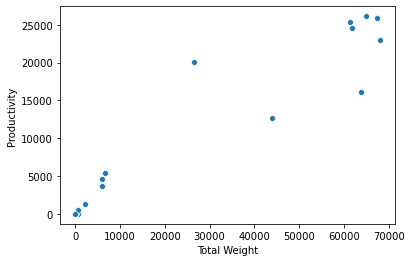

In [7]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [8]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.00000,51.000000,51.000000,18.000000
mean,2206.666667,195433.313725,22.617647,28.758824,9520.188843,0.094510,0.009451,0.0,1.17000,4.307059,3783.894706,41490.685556
std,2769.525986,4139.017408,28.273065,37.593800,21544.570351,0.215335,0.021534,0.0,4.96297,13.482130,8112.384684,27129.965034
min,66.000000,190768.000000,0.000000,0.000000,5.170000,0.000000,0.000000,0.0,0.00000,0.000000,1.460000,3662.000000
25%,262.500000,191975.000000,0.000000,0.000000,53.405000,0.000000,0.000000,0.0,0.00000,0.000000,40.890000,15036.000000
50%,1088.000000,193162.000000,0.000000,0.000000,149.790000,0.000000,0.000000,0.0,0.00000,0.000000,102.110000,45543.500000
75%,1713.500000,200343.500000,35.400000,46.940000,644.240000,0.010000,0.001000,0.0,0.00000,0.000000,439.240000,68071.250000
max,8457.000000,200923.000000,94.800000,164.050000,67991.533000,0.680000,0.068000,0.0,34.10000,67.480000,26123.310000,71075.000000


In [9]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
print(lm.intercept_)

469.82941708533417


In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.368024


In [13]:
predictions = lm.predict(X_test)

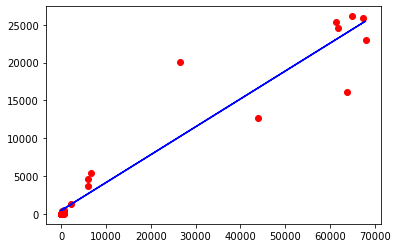

In [14]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 568.7758259840984
MSE: 586083.5073659782
RMSE: 765.5609102912571
r2_score: 0.9796922324577537


In [16]:
joblib.dump(lm,"Gas_Oil_Hsd.pkl")#only execute if rmse is less than half of mean of productivity

['Gas_Oil_Hsd.pkl']